# Get Sources

Fetch a negative set.

In [1]:
import ask_first
import numpy

FIRST_IMAGE_PATH = '/Volumes/Alger/archive.stsci.edu/pub/vla_first/data/'
FIRST_CATALOGUE_PATH = '/Users/Alger/data/FIRST/catalog_14dec17.bin'

In [2]:
cat = ask_first.read_catalogue(FIRST_CATALOGUE_PATH)

In [3]:
cat.head()

,RA,Dec,P(S),Fpeak,Fint,RMS,Maj,Min,PA,fMaj,...,SDSS #,SDSS Sep,SDSS i,SDSS Cl,2MASS #,2MASS Sep,2MASS K,Epoch Mean-yr,Epoch Mean-MJD,Epoch rms-MJD
0,07 27 34.289,+64 40 59.80,0.197,1.00,1.12,0.139,2.13,1.58,0.2,5.80,...,-1,99.0,99.0,-,1,6.76,14.62,2002.687,2452526.1,0.002
1,07 38 39.304,+64 40 16.28,0.014,2.39,5.73,0.139,9.31,3.58,136.6,10.76,...,-1,99.0,99.0,-,0,99.00,99.00,2002.687,2452526.1,0.001
2,07 50 24.019,+64 40 01.21,0.014,22.09,24.00,0.140,1.96,1.13,6.8,5.74,...,-1,99.0,99.0,-,0,99.00,99.00,2002.687,2452526.1,0.002
3,07 38 45.622,+64 39 50.12,0.014,2.39,4.33,0.140,6.43,3.27,13.5,8.40,...,-1,99.0,99.0,-,0,99.00,99.00,2002.687,2452526.1,0.000
4,07 39 32.799,+64 39 18.03,0.082,1.41,1.25,0.139,2.63,0.00,37.5,6.01,...,-1,99.0,99.0,-,0,99.00,99.00,2002.687,2452526.1,0.002


In [4]:
indices = list(range(len(cat)))
n = 1000
numpy.random.shuffle(indices)
selection = indices[:n]

In [5]:
cat_selected = cat.iloc[selection] 

In [15]:
import skimage.transform

width = 10 / 60  # deg
images = numpy.zeros((n, 300, 300))
for i, (_, row) in enumerate(cat_selected.iterrows()):
    coord = '{}{}'.format(row['RA'], row['Dec'])
    im = ask_first.get_image(coord, width, FIRST_IMAGE_PATH, field=row['Field'])
    if im.shape[0] == 0 or im.shape[1] == 0:
        continue
    im -= im.min()
    im /= im.max()
    images[i] = skimage.transform.resize(im, (300, 300), mode='constant')

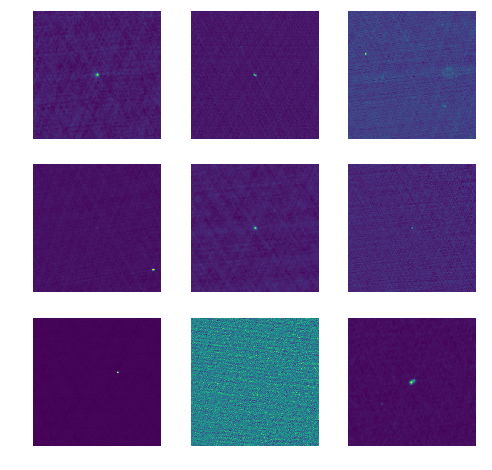

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))
for i, im in enumerate(images[9*3:9*4]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(im)
    plt.axis('off')

In [23]:
import h5py
with h5py.File('random_1000.h5', 'w') as f:
    f.create_dataset('images', data=images)